In [40]:
import csv
import numpy as np
import re
import matplotlib.pyplot as plt

import pandas as pd
%matplotlib inline

regex1 = r"\d+"
regex2 = r"c\d+"
X = np.zeros((10000,1000)) #1.000x10.000 matrix

In [41]:
#load data
with open("../Exercise 1/data_train.csv") as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    next(readCSV) #discard header
    for row in readCSV:
        match = re.search(regex1,row[0])
        match2 = re.search(regex2,row[0])
        row_i = int(match.group(0))-1
        col_i = int(match2.group(0)[1:]) -1
        X[row_i,col_i] = int(row[1])

In [42]:
#train_data, test_data = cv.train_test_split(X,test_size=0.25)
#
#train_data = X[:7500]
#test_data = X[7500:]
#
#M,N = X.shape
#R = np.zeros((10000, 1000))
#for i in range(train_data.shape[0]):
#    for j in range(train_data.shape[1]):
#        R[i,j] = train_data[i,j]
#
#shift = int(10000*(1-0.25))
#print(shift)
#T = np.zeros((10000, 1000))
#for i in range(test_data.shape[0]):
#    for j in range(test_data.shape[1]):
#        T[i+shift,j] = test_data[i,j]

#I = R.copy()
#I[I > 0] = 1
#I[I == 0] = 0
#I2 = T.copy()
#I2[I2 > 0] = 1
#I2[I2 == 0] = 0

# returns array of training data and an array of test data
def cv(X, k=5):
    # split indices of nonz-zero values in k sets but randomly!
    nzR, nzC = np.nonzero(X)
    zipped = zip(nzR,nzC)
    np.random.shuffle(zipped)
    nzR, nzC = zip(*zipped)
    nzRsplit = np.array_split(nzR, k)
    nzCsplit = np.array_split(nzC, k)
     
    X_train_sets = []
    X_test_sets = []
    for i in range(k):
        X_train = np.copy(X)
        X_train[(nzRsplit[i], nzCsplit[i])] = 0
        print 'X_train has ', np.count_nonzero(X_train), ' non-zeros.'
        X_train_sets.append(X_train)
    
        X_test = np.zeros(X.shape)
        X_test[(nzRsplit[i], nzCsplit[i])] = X[(nzRsplit[i], nzCsplit[i])]
        print 'X_test has ', np.count_nonzero(X_test), ' non-zeros.'
        X_test_sets.append(X_test)
        
    return X_train_sets, X_test_sets

In [43]:
def prediction(U,Z):
    return np.dot(U.T,Z)
def rmse(I,R,Q,P):
    return np.sqrt(np.sum((I * (R - prediction(P,Q)))**2)/len(R[R > 0]))

In [44]:
M,N = X.shape
print X.shape
K = 50
U = np.random.rand(K,M)
Z = np.random.rand(K,N)
n_epochs = 10
lmda = 0.00001       
gamma = 0.0001       # step size

train_errors = {k: [] for k in range(n_epochs)}
test_errors = {k: [] for k in range(n_epochs)}

#for it in range(5):
#    for epoch in range(n_epochs):
#        train_errors[epoch].append(it*epoch)           
#for epoch in range(n_epochs):
#    print 'epoch: ', epoch, ', ', train_errors[epoch]

(10000, 1000)


In [45]:
X_train_set, X_test_set = cv(X, k=5)
count = 0
for X_train, X_test in zip(X_train_set, X_test_set):
    R = X_train
    T = X_test
    I = R.copy()
    I[I > 0] = 1
    I2 = T.copy()
    I2[I2 > 0] = 1
    
    #DO SGD
    users,movies = R.nonzero()
    #print 'Users: ',users.shape
    #print 'Movies: ', movies.shape

    print 'CV iter = ', count
    for epoch in range(n_epochs):
        for u, i in zip(users,movies):
            gamma = 0.001*(1.0/(np.sqrt(epoch+1.0)))
            e = R[u, i] - prediction(U[:,u],Z[:,i])
            U[:,u] += gamma * ( e * Z[:,i] - lmda*U[:,u] )
            Z[:,i] += gamma * ( e * U[:,u] - lmda*Z[:,i] )
        train_rmse = rmse(I,R,Z,U) # Calculate root mean squared error from train dataset
        test_rmse = rmse(I2,T,Z,U) # Calculate root mean squared error from test dataset
        train_errors[epoch].append(train_rmse)
        test_errors[epoch].append(test_rmse)
        
    count += 1
    if count >= 2:
        break

X_train has  941561  non-zeros.
X_test has  235391  non-zeros.
X_train has  941561  non-zeros.
X_test has  235391  non-zeros.
X_train has  941562  non-zeros.
X_test has  235390  non-zeros.
X_train has  941562  non-zeros.
X_test has  235390  non-zeros.
X_train has  941562  non-zeros.
X_test has  235390  non-zeros.
CV iter =  0
CV iter =  1


In [48]:
tr_err = []
ts_err = []
for epoch in range(n_epochs):
    print train_errors[epoch]
    #print test_errors[epoch]
for epoch in range(n_epochs):
    tr_err.append( np.mean(train_errors[epoch]) )
    ts_err.append( np.mean(test_errors[epoch]) )
    
    
print len(ts)

[1.3121931189975977, 1.0751178945341642]
[1.2371430829404464, 1.0614036785960479]
[1.1960308519891343, 1.0517195573931071]
[1.1676644565961138, 1.0442177807869584]
[1.1462926284416146, 1.038106686364175]
[1.1293682225500792, 1.0329656104861464]
[1.1155137695151849, 1.0285419641602167]
[1.1038962642837467, 1.024671345434695]
[1.0939736113316147, 1.0212403908631276]
[1.0853739048433866, 1.0181674461864809]
1.19365550677
1.14927338077
1.12387520469
1.10594111869
1.0921996574
1.08116691652
1.07202786684
1.06428380486
1.0576070011
1.05177067551


1.08547348662
1.08259049678
1.06182025963
1.07233821747
1.04793467109
1.06836114237
1.03808911789
1.0660424199
1.03053677071
1.06448284226
1.0244697867
1.06336033436
1.01944201203
1.06252191389
1.01518001083
1.06188224395
1.01150397288
1.06138856805
1.00828940297
1.06100587437


ValueError: x and y must have same first dimension

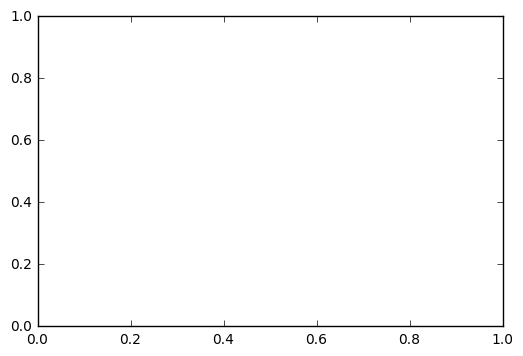

In [38]:

for epoch in range(n_epochs):
    train_errors[epoch] = np.mean(train_errors[epoch])
    test_errors[epoch] = np.mean(test_errors[epoch])


plt.plot(range(n_epochs), train_errors, marker='o', label='Training Data');
plt.plot(range(n_epochs), test_errors, marker='v', label='Test Data');
plt.title('SGD Learning Curve')
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

In [ ]:
#now lets predict the data from samplesubmission
fout = open('mysubmission.csv', 'w')
fout.write("Id,Prediction\n")
with open("SampleSubmission.csv") as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    next(readCSV) #discard header
    for row in readCSV:
        match = re.search(regex1,row[0])
        match2 = re.search(regex2,row[0])
        row_i = int(match.group(0))-1
        col_i = int(match2.group(0)[1:]) -1
        calc = prediction(U[:,row_i], Z[:,col_i])
        print(calc)
        fout.write(row[0]+","+str(calc)+"\n")
    fout.close()